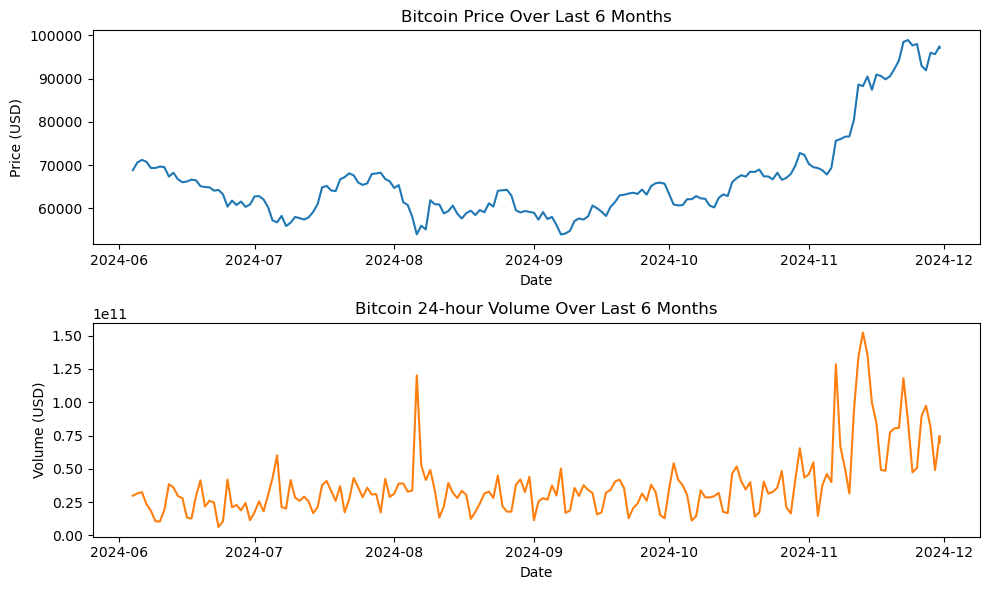

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define the CoinGecko API URL for historical data
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '180',  # 6 months (180 days)
    'interval': 'daily'  # Daily data
}

# Send the request to the CoinGecko API
response = requests.get(url, params=params)

# If the request is successful, process the data
if response.status_code == 200:
    data = response.json()
    
    # Extract price and volume data
    prices = data['prices']
    volumes = data['total_volumes']
    
    # Convert to DataFrame
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['volume'] = [volume[1] for volume in volumes]
    
    # Convert timestamp to datetime
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    # Plot Bitcoin price and volume over the last 6 months
    plt.figure(figsize=(10,6))
    
    # Plot Price
    plt.subplot(2, 1, 1)
    plt.plot(df['date'], df['price'], label="Price", color='tab:blue')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Bitcoin Price Over Last 6 Months')
    
    # Plot Volume
    plt.subplot(2, 1, 2)
    plt.plot(df['date'], df['volume'], label="Volume", color='tab:orange')
    plt.xlabel('Date')
    plt.ylabel('Volume (USD)')
    plt.title('Bitcoin 24-hour Volume Over Last 6 Months')
    
    plt.tight_layout()
    plt.show()

else:
    print("Error fetching data")

In [73]:
# Extract price and volume data
prices = data['prices']
volumes = data['total_volumes']

# Convert to DataFrame
df = pd.DataFrame(prices, columns=['timestamp', 'price'])
df['volume'] = [volume[1] for volume in volumes]

# Convert timestamp to datetime
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    

In [75]:
df.count()

timestamp    181
price        181
volume       181
date         181
dtype: int64

In [77]:
df = df.tail(60)

In [79]:
df.count()

timestamp    60
price        60
volume       60
date         60
dtype: int64

In [81]:
df.tail()

,timestamp,price,volume,date
176,1732665600000,91931.830773,9.738924e+10,2024-11-27 00:00:00
177,1732752000000,95981.180572,8.146935e+10,2024-11-28 00:00:00
178,1732838400000,95661.595958,4.906793e+10,2024-11-29 00:00:00
179,1732924800000,97453.247345,7.467003e+10,2024-11-30 00:00:00
180,1732927409000,97097.205946,6.980710e+10,2024-11-30 00:43:29


In [83]:
df['volume'] = df['volume'] / 1_000_000_000
# df

,timestamp,price,volume,date
121,1727913600000,60655.559792,41.870731,2024-10-03 00:00:00
122,1728000000000,60727.863952,37.711138,2024-10-04 00:00:00
123,1728086400000,62103.010473,30.349060,2024-10-05 00:00:00
124,1728172800000,62091.932585,11.095453,2024-10-06 00:00:00
125,1728259200000,62811.799728,14.592423,2024-10-07 00:00:00
126,1728345600000,62287.390105,33.878876,2024-10-08 00:00:00
127,1728432000000,62185.230424,28.626429,2024-10-09 00:00:00
128,1728518400000,60597.150456,28.530748,2024-10-10 00:00:00
129,1728604800000,60195.180738,29.481972,2024-10-11 00:00:00
130,1728691200000,62392.340483,32.008659,2024-10-12 00:00:00


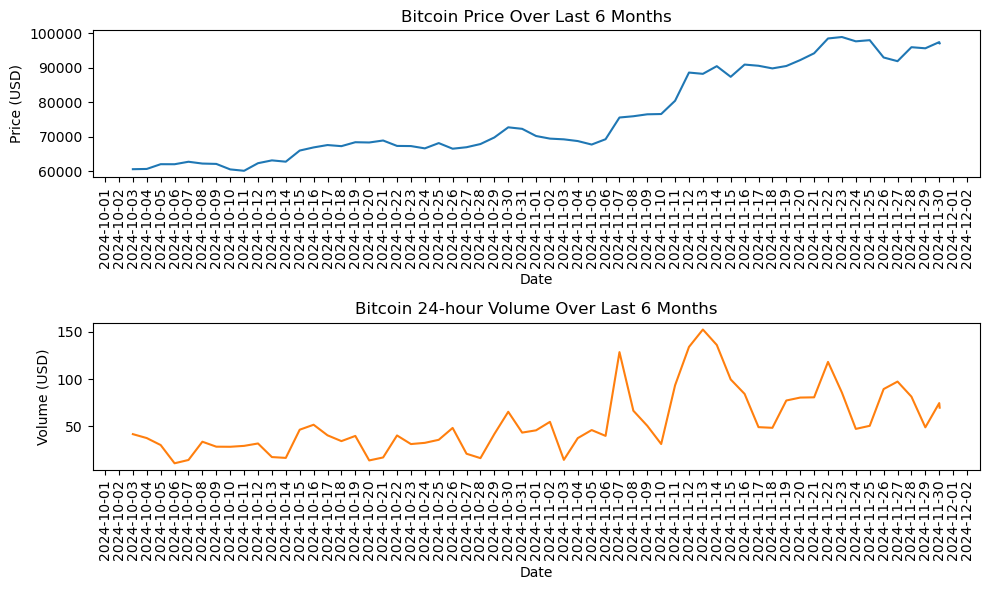

In [85]:


# Extract price and volume data
# prices = data['prices']
# volumes = data['total_volumes']

# # Convert to DataFrame
# df = pd.DataFrame(prices, columns=['timestamp', 'price'])
# df['volume'] = [volume[1] for volume in volumes]

# # Convert timestamp to datetime
# df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Plot Bitcoin price and volume over the last 6 months

plt.figure(figsize=(10,6))

# Plot Price
plt.subplot(2, 1, 1)
plt.plot(df['date'], df['price'], label="Price", color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Over Last 6 Months')
plt.xticks(df['date'][::1], rotation=90)  # Set ticks every 10 days for clarity
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=90))  # Display daily ticks
    
# Plot Volume
plt.subplot(2, 1, 2)
plt.plot(df['date'], df['volume'], label="Volume", color='tab:orange')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin 24-hour Volume Over Last 6 Months')

plt.xticks(df['date'][::1], rotation=90)  # Set ticks every 10 days for clarity
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=90))  # Display daily ticks
    

plt.tight_layout()
plt.show()



/tmp/ipykernel_1892985/1210622878.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
/home/j/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


                 date  predicted_volume
0 2024-12-01 05:02:32      8.436232e+10
1 2024-12-02 05:02:32      8.503459e+10
2 2024-12-03 05:02:32      8.570686e+10


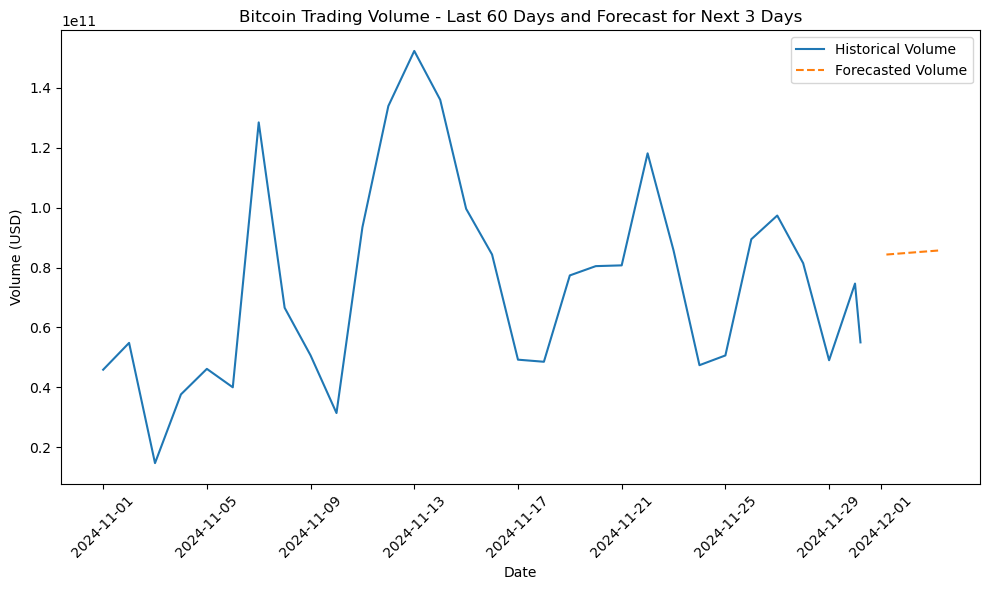

In [89]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Step 1: Fetch the last 60 days of Bitcoin volume data using CoinGecko API
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '30',  # Last 60 days
    'interval': 'daily'  # Daily data
}

response = requests.get(url, params=params)
data = response.json()

# Step 2: Process the data
volumes = data['total_volumes']  # Get the trading volume data
dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
volumes = [item[1] for item in volumes]  # Get the volume values

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'volume': volumes})

# Step 3: Prepare the data for linear regression
df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())  # Convert dates to ordinal format for regression
X = df[['date_ordinal']]  # Feature (dates)
y = df['volume']  # Target (volume)

# Step 4: Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 5: Forecast the next 3 days' volume
future_dates = [df['date'].max() + timedelta(days=i) for i in range(1, 4)]  # Next 3 days
future_dates_ordinal = [date.toordinal() for date in future_dates]  # Convert to ordinal format
future_volume = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))  # Predict volume

# Display the forecasted volumes
forecast = pd.DataFrame({'date': future_dates, 'predicted_volume': future_volume})
print(forecast)

# Step 6: Plot the historical volume and forecast
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['volume'], label="Historical Volume", color='tab:blue')
plt.plot(future_dates, future_volume, label="Forecasted Volume", color='tab:orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin Trading Volume - Last 60 Days and Forecast for Next 3 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1892985/3325182925.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A d

                  date  predicted_volume
61 2024-12-01 04:36:15      7.844315e+10
62 2024-12-02 04:36:15      8.221817e+10
63 2024-12-03 04:36:15      7.848700e+10


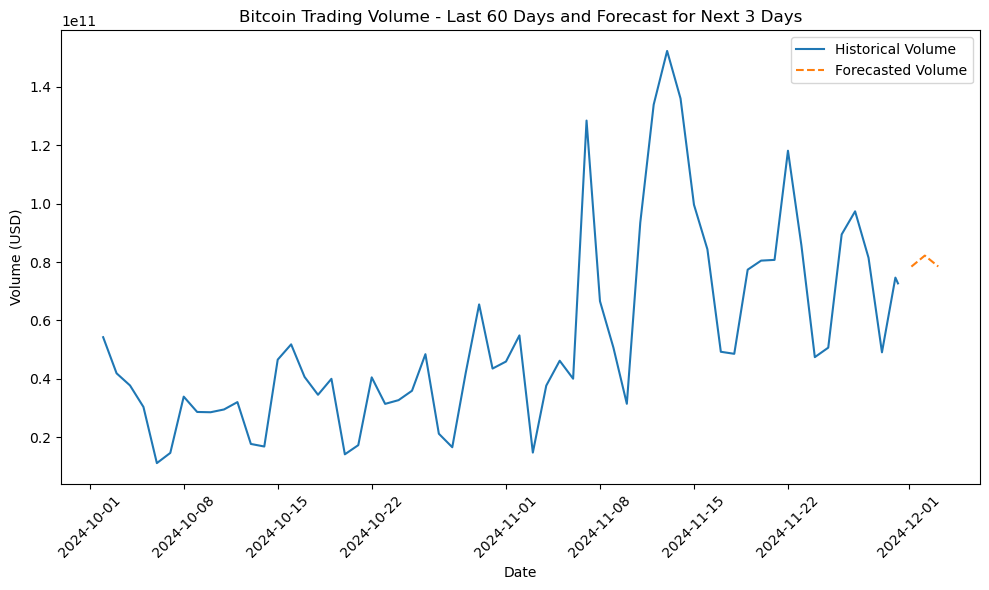

In [91]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# Step 1: Fetch the last 60 days of Bitcoin volume data using CoinGecko API
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '60',  # Last 60 days
    'interval': 'daily'  # Daily data
}

response = requests.get(url, params=params)
data = response.json()

# Step 2: Process the data
volumes = data['total_volumes']  # Get the trading volume data
dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
volumes = [item[1] for item in volumes]  # Get the volume values

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'volume': volumes})

# Step 3: Prepare the data for ARIMA
df.set_index('date', inplace=True)  # Set date as the index
df = df['volume']  # Use only the volume for forecasting

# Step 4: Fit the ARIMA model (we'll use ARIMA(5,1,0) as a basic example, but this could be optimized)
model = ARIMA(df, order=(5,1,0))  # p=5, d=1, q=0 (for simplicity, you may want to tune these parameters)
model_fit = model.fit()

# Step 5: Forecast the next 3 days
forecast = model_fit.forecast(steps=3)  # Forecast for the next 3 days

# Step 6: Display the forecasted volumes
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, 4)]  # Next 3 days
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_volume': forecast})

# Show the forecasted data
print(forecast_df)

# Step 7: Plot the historical volume and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label="Historical Volume", color='tab:blue')
plt.plot(future_dates, forecast, label="Forecasted Volume", color='tab:orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin Trading Volume - Last 60 Days and Forecast for Next 3 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1892985/1409991210.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A d

                  date  predicted_volume
61 2024-12-01 05:06:10      7.961508e+10
62 2024-12-02 05:06:10      8.287827e+10
63 2024-12-03 05:06:10      7.886205e+10


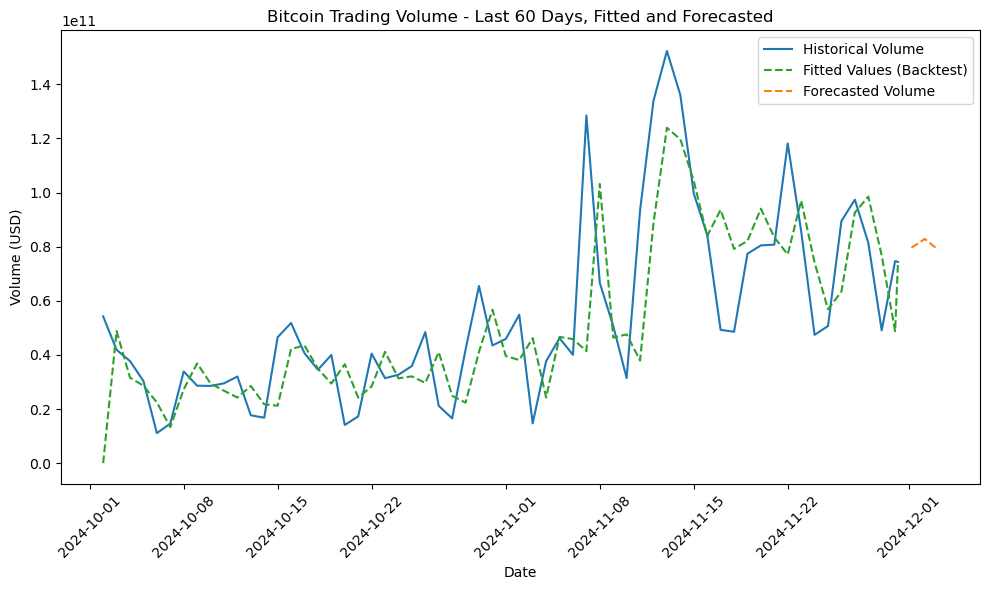

In [95]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# Step 1: Fetch the last 60 days of Bitcoin volume data using CoinGecko API
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '60',  # Last 60 days
    'interval': 'daily'  # Daily data
}

response = requests.get(url, params=params)
data = response.json()

# Step 2: Process the data
volumes = data['total_volumes']  # Get the trading volume data
dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
volumes = [item[1] for item in volumes]  # Get the volume values

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'volume': volumes})

# Step 3: Prepare the data for ARIMA
df.set_index('date', inplace=True)  # Set date as the index
df = df['volume']  # Use only the volume for forecasting

# Step 4: Fit the ARIMA model (we'll use ARIMA(5,1,0) as a basic example, but this could be optimized)
model = ARIMA(df, order=(5,1,0))  # p=5, d=1, q=0 (for simplicity, you may want to tune these parameters)
model_fit = model.fit()

# Step 5: Backtest the model (predict the values on the training data itself)
fitted_values = model_fit.fittedvalues  # Fitted values for the historical data

# Step 6: Forecast the next 3 days
forecast = model_fit.forecast(steps=3)  # Forecast for the next 3 days
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, 4)]  # Next 3 days
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_volume': forecast})

# Show the forecasted data
print(forecast_df)

# Step 7: Plot the historical volume, fitted values (backtest), and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label="Historical Volume", color='tab:blue')
plt.plot(df.index, fitted_values, label="Fitted Values (Backtest)", color='tab:green', linestyle='--')
plt.plot(future_dates, forecast, label="Forecasted Volume", color='tab:orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin Trading Volume - Last 60 Days, Fitted and Forecasted')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1892985/3915285196.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A d

                  date  predicted_volume
61 2024-12-01 05:06:10      7.961508e+10
62 2024-12-02 05:06:10      8.287827e+10
63 2024-12-03 05:06:10      7.886205e+10
64 2024-12-04 05:06:10      7.164710e+10
65 2024-12-05 05:06:10      7.251799e+10
66 2024-12-06 05:06:10      7.420493e+10
67 2024-12-07 05:06:10      7.648516e+10


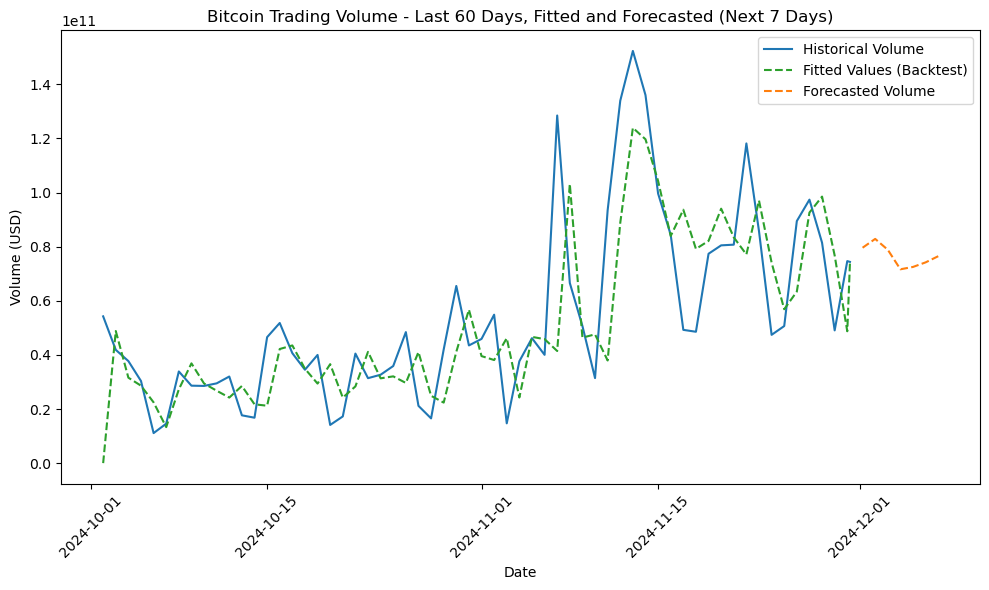

In [111]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# Step 1: Fetch the last 60 days of Bitcoin volume data using CoinGecko API
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '60',  # Last 60 days
    'interval': 'daily'  # Daily data
}

response = requests.get(url, params=params)
data = response.json()

# Step 2: Process the data
volumes = data['total_volumes']  # Get the trading volume data
dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
volumes = [item[1] for item in volumes]  # Get the volume values

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'volume': volumes})

# Step 3: Prepare the data for ARIMA
df.set_index('date', inplace=True)  # Set date as the index
df = df['volume']  # Use only the volume for forecasting

# Step 4: Fit the ARIMA model (we'll use ARIMA(5,1,0) as a basic example, but this could be optimized)
model = ARIMA(df, order=(5,1,0))  # p=5, d=1, q=0 (for simplicity, you may want to tune these parameters)
model_fit = model.fit()

# Step 5: Backtest the model (predict the values on the training data itself)
fitted_values = model_fit.fittedvalues  # Fitted values for the historical data

# Step 6: Forecast the next 7 days
forecast = model_fit.forecast(steps=7)  # Forecast for the next 7 days
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, 8)]  # Next 7 days
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_volume': forecast})

# Show the forecasted data
print(forecast_df)

# Step 7: Plot the historical volume, fitted values (backtest), and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label="Historical Volume", color='tab:blue')
plt.plot(df.index, fitted_values, label="Fitted Values (Backtest)", color='tab:green', linestyle='--')
plt.plot(future_dates, forecast, label="Forecasted Volume", color='tab:orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin Trading Volume - Last 60 Days, Fitted and Forecasted (Next 7 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1892985/2003450387.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A d

                  date  predicted_volume
61 2024-12-01 05:06:10      7.148008e+10
62 2024-12-02 05:06:10      8.162146e+10
63 2024-12-03 05:06:10      9.066932e+10
64 2024-12-04 05:06:10      9.106174e+10
65 2024-12-05 05:06:10      7.845159e+10
66 2024-12-06 05:06:10      6.741976e+10
67 2024-12-07 05:06:10      6.273335e+10


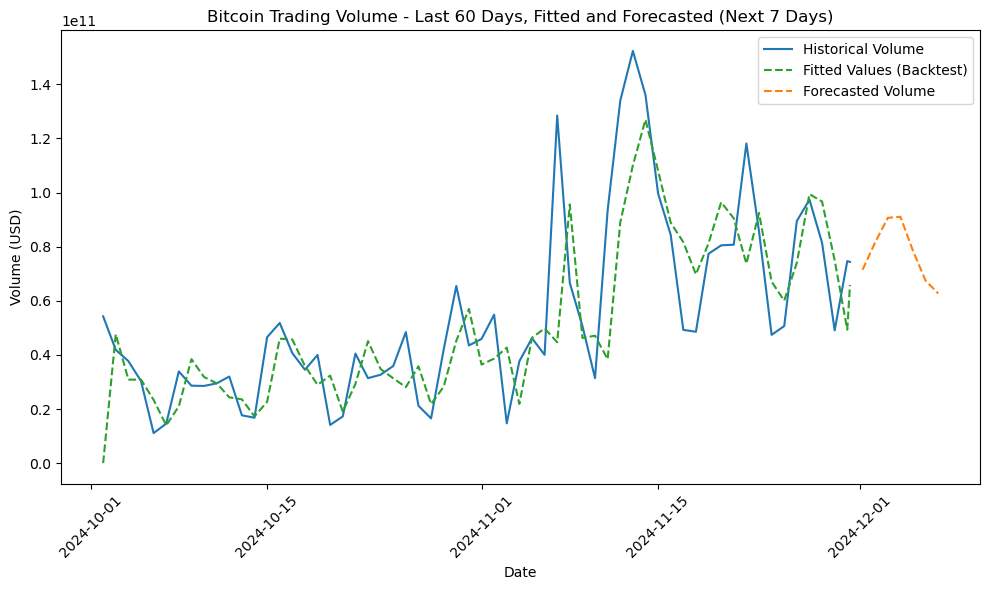

In [146]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# Step 1: Fetch the last 60 days of Bitcoin volume data using CoinGecko API
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '60',  # Last 60 days
    'interval': 'daily'  # Daily data
}

response = requests.get(url, params=params)
data = response.json()

# Step 2: Process the data
volumes = data['total_volumes']  # Get the trading volume data
dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
volumes = [item[1] for item in volumes]  # Get the volume values

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'volume': volumes})

# Step 3: Prepare the data for ARIMA
df.set_index('date', inplace=True)  # Set date as the index
df = df['volume']  # Use only the volume for forecasting

# Step 4: Fit the ARIMA model (we'll use ARIMA(5,1,0) as a basic example, but this could be optimized)
model = ARIMA(df, order=(7,1,5))  # p=5, d=1, q=0 (for simplicity, you may want to tune these parameters)
model_fit = model.fit()

# Step 5: Backtest the model (predict the values on the training data itself)
fitted_values = model_fit.fittedvalues  # Fitted values for the historical data

# Step 6: Forecast the next 7 days
forecast = model_fit.forecast(steps=7)  # Forecast for the next 7 days
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, 8)]  # Next 7 days
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_volume': forecast})

# Show the forecasted data
print(forecast_df)

# Step 7: Plot the historical volume, fitted values (backtest), and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label="Historical Volume", color='tab:blue')
plt.plot(df.index, fitted_values, label="Fitted Values (Backtest)", color='tab:green', linestyle='--')
plt.plot(future_dates, forecast, label="Forecasted Volume", color='tab:orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin Trading Volume - Last 60 Days, Fitted and Forecasted (Next 7 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [103]:
# !pip install pmdarima


/tmp/ipykernel_1892985/1131946144.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3046.655, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3048.190, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3049.717, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3049.285, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3046.209, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3042.221, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3040.491, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3048.640, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3041.295, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3044.582, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3046.831, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3039.425, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3040.264, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : 

/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


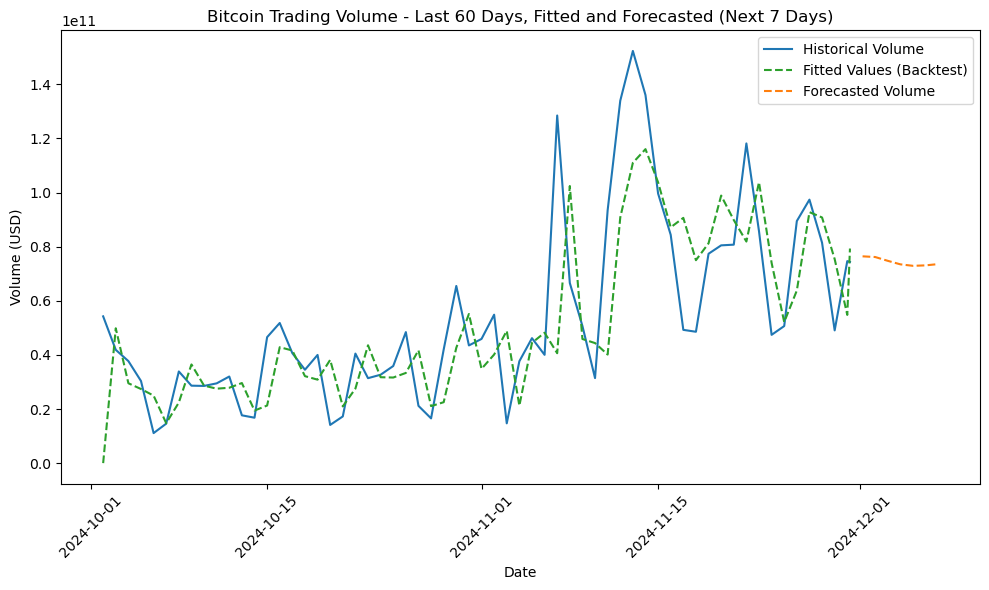

In [105]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from datetime import datetime, timedelta

# Step 1: Fetch the last 60 days of Bitcoin volume data using CoinGecko API
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '60',  # Last 60 days
    'interval': 'daily'  # Daily data
}

response = requests.get(url, params=params)
data = response.json()

# Step 2: Process the data
volumes = data['total_volumes']  # Get the trading volume data
dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
volumes = [item[1] for item in volumes]  # Get the volume values

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'volume': volumes})

# Step 3: Prepare the data for ARIMA
df.set_index('date', inplace=True)  # Set date as the index
df = df['volume']  # Use only the volume for forecasting

# Step 4: Use auto_arima to find the best model
model = auto_arima(df, seasonal=False, m=1, trace=True, suppress_warnings=True)

# Step 5: Fit the best ARIMA model (auto_arima automatically selects the best p, d, q)
model_fit = model.fit(df)

# Step 6: Backtest the model (predict the values on the training data itself)
fitted_values = model_fit.predict_in_sample()  # Fitted values for the historical data

# Step 7: Forecast the next 7 days
forecast = model_fit.predict(n_periods=7)  # Forecast for the next 7 days
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, 8)]  # Next 7 days
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_volume': forecast})

# Show the forecasted data
print(forecast_df)

# Step 8: Plot the historical volume, fitted values (backtest), and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label="Historical Volume", color='tab:blue')
plt.plot(df.index, fitted_values, label="Fitted Values (Backtest)", color='tab:green', linestyle='--')
plt.plot(future_dates, forecast, label="Forecasted Volume", color='tab:orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin Trading Volume - Last 60 Days, Fitted and Forecasted (Next 7 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1892985/3442468344.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3046.655, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3048.190, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3049.717, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3049.285, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3046.209, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3042.221, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3040.491, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3048.640, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3041.295, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3044.582, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3046.831, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3039.425, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3040.264, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : 

/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


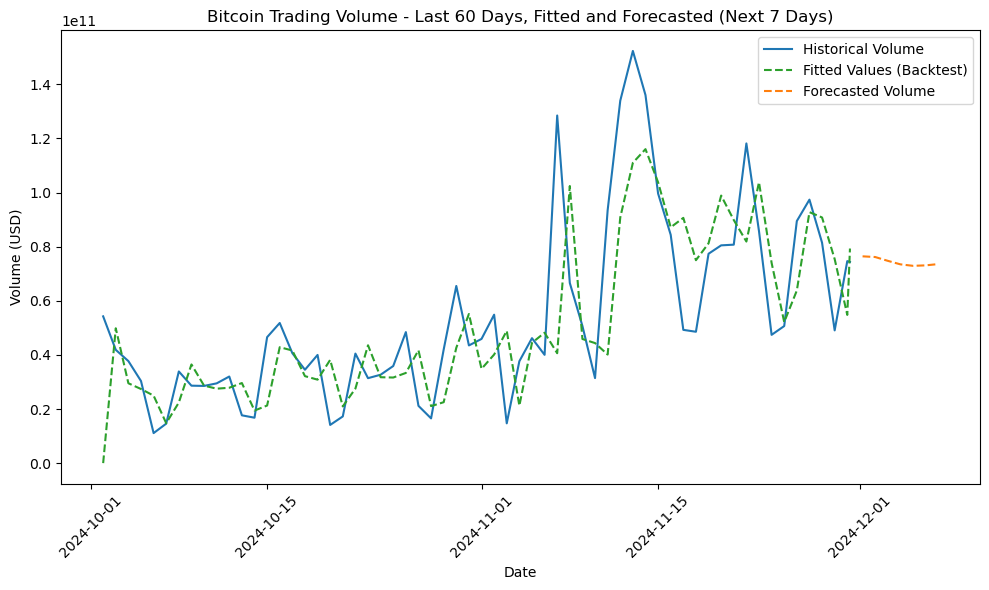

In [117]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from datetime import datetime, timedelta

# Step 1: Fetch the last 60 days of Bitcoin volume data using CoinGecko API
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '60',  # Last 60 days
    'interval': 'daily'  # Daily data
}

response = requests.get(url, params=params)
data = response.json()

# Step 2: Process the data
volumes = data['total_volumes']  # Get the trading volume data
dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
volumes = [item[1] for item in volumes]  # Get the volume values

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'volume': volumes})

# Step 3: Prepare the data for ARIMA
df.set_index('date', inplace=True)  # Set date as the index
df = df['volume']  # Use only the volume for forecasting

# Step 4: Use auto_arima to find the best model (with constraints to avoid overfitting)
model = auto_arima(df, seasonal=False, m=1, max_p=10, max_d=5 ,max_q=10, 
                   stepwise=True, trace=True, suppress_warnings=True)

# Step 5: Fit the best ARIMA model (auto_arima automatically selects the best p, d, q)
model_fit = model.fit(df)

# Step 6: Backtest the model (predict the values on the training data itself)
fitted_values = model_fit.predict_in_sample()  # Fitted values for the historical data

# Step 7: Forecast the next 7 days
forecast = model_fit.predict(n_periods=7)  # Forecast for the next 7 days
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, 8)]  # Next 7 days
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_volume': forecast})

# Show the forecasted data
print(forecast_df)

# Step 8: Plot the historical volume, fitted values (backtest), and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label="Historical Volume", color='tab:blue')
plt.plot(df.index, fitted_values, label="Fitted Values (Backtest)", color='tab:green', linestyle='--')
plt.plot(future_dates, forecast, label="Forecasted Volume", color='tab:orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin Trading Volume - Last 60 Days, Fitted and Forecasted (Next 7 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [124]:
# !pip install pandas yfinance pmdarima matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 4.9 MB/s eta 0:00:00 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138964 sha256=689dd95d7a624e69ad31c17b2bde6b7ea9d0b3e37cbe951b0592362ad1a3a4b3
  Stored in directory: /home/j/.cache/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2136.868, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2126.912, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2128.796, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2129.003, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2127.496, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2128.116, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.679 seconds


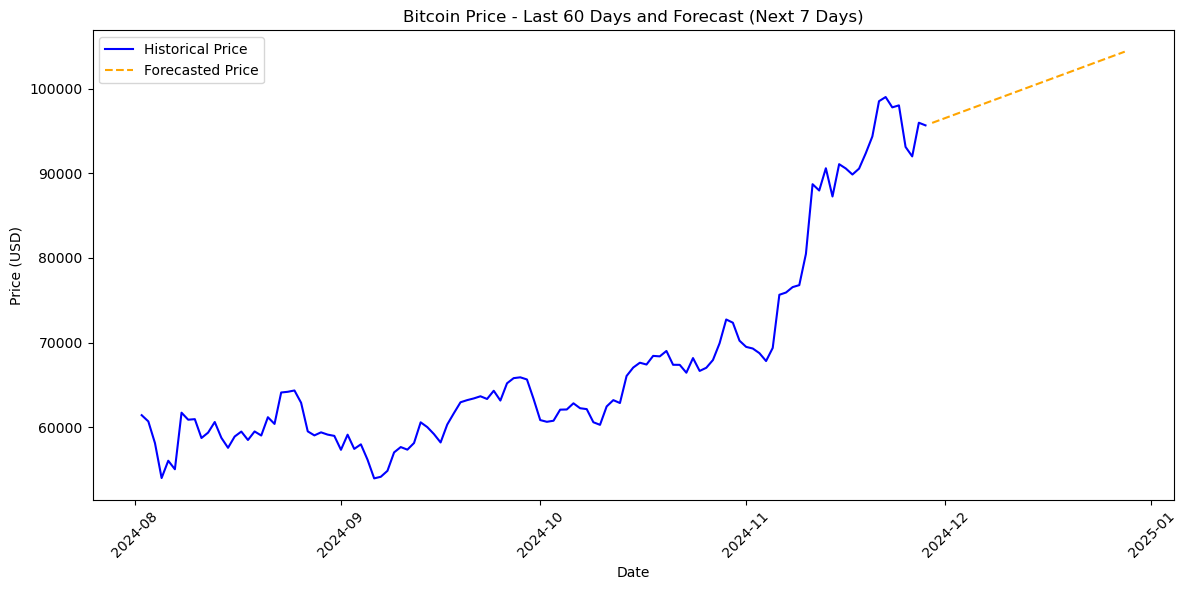

                 date  predicted_price
2024-11-29 2024-11-29     95942.616227
2024-11-30 2024-11-30     96232.763705
2024-12-01 2024-12-01     96522.911182
2024-12-02 2024-12-02     96813.058660
2024-12-03 2024-12-03     97103.206137
2024-12-04 2024-12-04     97393.353615
2024-12-05 2024-12-05     97683.501092
2024-12-06 2024-12-06     97973.648570
2024-12-07 2024-12-07     98263.796047
2024-12-08 2024-12-08     98553.943525
2024-12-09 2024-12-09     98844.091002
2024-12-10 2024-12-10     99134.238480
2024-12-11 2024-12-11     99424.385957
2024-12-12 2024-12-12     99714.533435
2024-12-13 2024-12-13    100004.680912
2024-12-14 2024-12-14    100294.828390
2024-12-15 2024-12-15    100584.975867
2024-12-16 2024-12-16    100875.123345
2024-12-17 2024-12-17    101165.270822
2024-12-18 2024-12-18    101455.418300
2024-12-19 2024-12-19    101745.565777
2024-12-20 2024-12-20    102035.713255
2024-12-21 2024-12-21    102325.860732
2024-12-22 2024-12-22    102616.008210
2024-12-23 2024-12-23    

In [136]:
import pandas as pd
import yfinance as yf
from pmdarima import auto_arima
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Fetch Bitcoin data for the last 60 days
symbol = "BTC-USD"
end_date = datetime.now()
start_date = end_date - timedelta(days=120)

# Download the data
btc_data = yf.download(symbol, start=start_date, end=end_date)
btc_data = btc_data[['Close']]  # Use the closing price
btc_data.rename(columns={'Close': 'price'}, inplace=True)

# Fit ARIMA model using auto_arima
model = auto_arima(btc_data, seasonal=False, max_p=5, max_d=2, max_q=5,
                   stepwise=True, trace=True, suppress_warnings=True)

# Fit the model to the data
model_fit = model.fit(btc_data)

# Predict the next 7 days
forecast = model_fit.predict(n_periods=30)
future_dates = [btc_data.index[-1] + timedelta(days=i) for i in range(1, 31)]

# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_price': forecast})

# Plot historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['price'], label='Historical Price', color='blue')
plt.plot(future_dates, forecast, label='Forecasted Price', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price - Last 60 Days and Forecast (Next 7 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the forecasted data
print(forecast_df)


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/j/anaconda3/lib/python3.12/site-packages/st

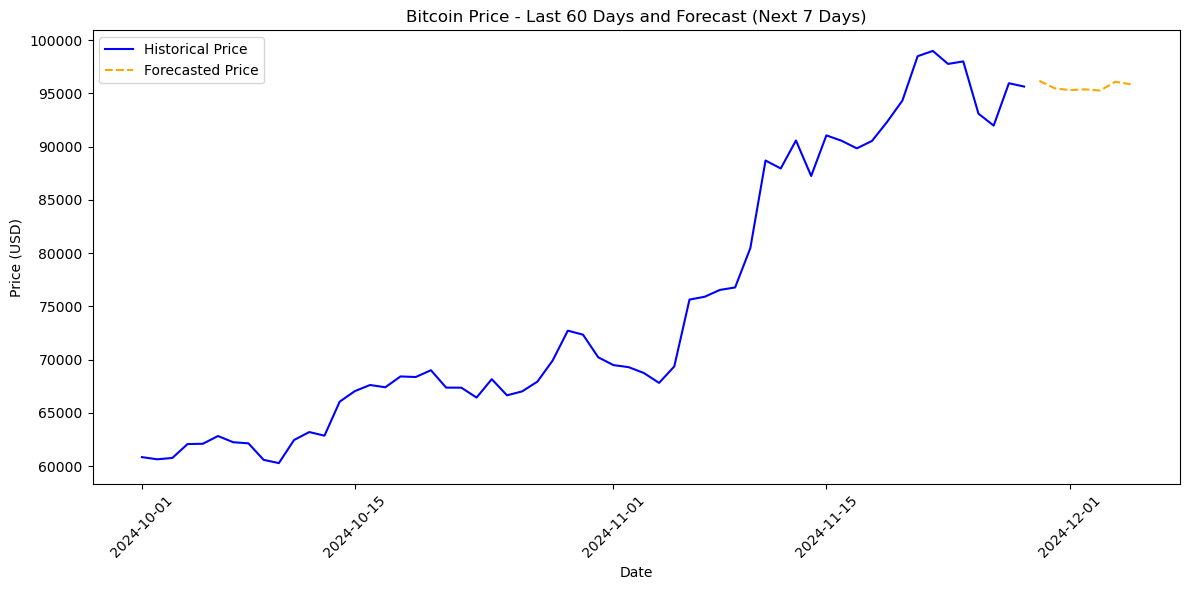

                 date  predicted_price
2024-11-29 2024-11-29     96193.359082
2024-11-30 2024-11-30     95490.546097
2024-12-01 2024-12-01     95319.859842
2024-12-02 2024-12-02     95389.833890
2024-12-03 2024-12-03     95279.997777
2024-12-04 2024-12-04     96100.352203
2024-12-05 2024-12-05     95870.357026


In [144]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Fetch Bitcoin data for the last 60 days
symbol = "BTC-USD"
end_date = datetime.now()
start_date = end_date - timedelta(days=60)

# Download the data
btc_data = yf.download(symbol, start=start_date, end=end_date)
btc_data = btc_data[['Close']]  # Use the closing price
btc_data.rename(columns={'Close': 'price'}, inplace=True)

# Fit ARIMA model with specified order (5, 1, 0)
model = ARIMA(btc_data['price'], order=(7, 1, 5))
model_fit = model.fit()

# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)
future_dates = [btc_data.index[-1] + timedelta(days=i) for i in range(1, 8)]

# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_price': forecast})

# Plot historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['price'], label='Historical Price', color='blue')
plt.plot(future_dates, forecast, label='Forecasted Price', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price - Last 60 Days and Forecast (Next 7 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the forecasted data
print(forecast_df)


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/j/anaconda3/lib/python3.12/site-packages/st

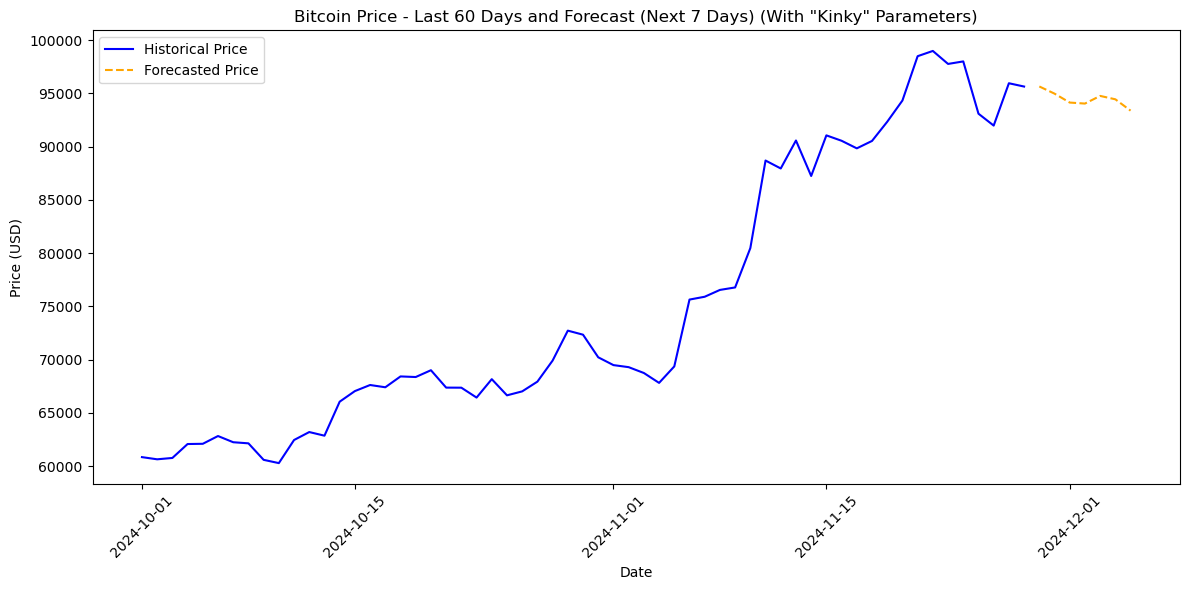

                 date  predicted_price
2024-11-29 2024-11-29     95659.648203
2024-11-30 2024-11-30     94986.823396
2024-12-01 2024-12-01     94148.373376
2024-12-02 2024-12-02     94053.342275
2024-12-03 2024-12-03     94773.001146
2024-12-04 2024-12-04     94453.552812
2024-12-05 2024-12-05     93389.493718


In [150]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

# Fetch Bitcoin data for the last 60 days
symbol = "BTC-USD"
end_date = datetime.now()
start_date = end_date - timedelta(days=60)

# Download the data
btc_data = yf.download(symbol, start=start_date, end=end_date)
btc_data = btc_data[['Close']]  # Use the closing price
btc_data.rename(columns={'Close': 'price'}, inplace=True)

# Fit ARIMA model with "kinky" parameters (e.g., (9, 1, 7))
model = ARIMA(btc_data['price'], order=(10, 1, 7))
model_fit = model.fit()

# (9, 1, 7)
# (8, 1, 6)
# (7, 1, 8)
# (10, 1, 7)

# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)

# Add stochastic noise for even more dynamic projections
noise = np.random.normal(0, 100, size=7)  # Adjust scale for more volatility
forecast_with_noise = forecast + noise
future_dates = [btc_data.index[-1] + timedelta(days=i) for i in range(1, 8)]

# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_price': forecast_with_noise})

# Plot historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['price'], label='Historical Price', color='blue')
plt.plot(future_dates, forecast_with_noise, label='Forecasted Price', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price - Last 60 Days and Forecast (Next 7 Days) (With "Kinky" Parameters)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the forecasted data
print(forecast_df)
